**SIMULATED ANNEALING ALGORITHM**

**kroa100 Dataset (Optimal Solution - 21282)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

**Define Coordinate Class**

In [2]:
class Coordinate:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    #Calculate Euclidean distance between two coordinates
    @staticmethod
    def get_distance(a, b):
        return math.sqrt((a.x - b.x) ** 2 + (a.y - b.y) ** 2)
    
    #Compute total distance for a given route
    @staticmethod
    def get_total_distance(coords):
        dist = sum(Coordinate.get_distance(a, b) for a, b in zip(coords[:-1], coords[1:]))
        dist += Coordinate.get_distance(coords[0], coords[-1])
        return dist

**Load Dataset**

In [3]:
coordinates = [
    (1380, 939), (2848, 96), (3510, 1671), (457, 334), (3888, 666), (984, 965), (2721, 1482),
    (1286, 525), (2716, 1432), (738, 1325), (1251, 1832), (2728, 1698), (3815, 169), (3683, 1533),
    (1247, 1945), (123, 862), (1234, 1946), (252, 1240), (611, 673), (2576, 1676), (928, 1700),
    (53, 857), (1807, 1711), (274, 1420), (2574, 946), (178, 24), (2678, 1825), (1795, 962),
    (3384, 1498), (3520, 1079), (1256, 61), (1424, 1728), (3913, 192), (3085, 1528), (2573, 1969),
    (463, 1670), (3875, 598), (298, 1513), (3479, 821), (2542, 236), (3955, 1743), (1323, 280),
    (3447, 1830), (2936, 337), (1621, 1830), (3373, 1646), (1393, 1368), (3874, 1318), (938, 955),
    (3022, 474), (2482, 1183), (3854, 923), (376, 825), (2519, 135), (2945, 1622), (953, 268),
    (2628, 1479), (2097, 981), (890, 1846), (2139, 1806), (2421, 1007), (2290, 1810), (1115, 1052),
    (2588, 302), (327, 265), (241, 341), (1917, 687), (2991, 792), (2573, 599), (19, 674),
    (3911, 1673), (872, 1559), (2863, 558), (929, 1766), (839, 620), (3893, 102), (2178, 1619),
    (3822, 899), (378, 1048), (1178, 100), (2599, 901), (3416, 143), (2961, 1605), (611, 1384),
    (3113, 885), (2597, 1830), (2586, 1286), (161, 906), (1429, 134), (742, 1025), (1625, 1651),
    (1187, 706), (1787, 1009), (22, 987), (3640, 43), (3756, 882), (776, 392), (1724, 1642),
    (198, 1810), (3950, 1558)
]





**Simulated Annealing Algorithm**

In [4]:
#SA params: 
# T0 = initial temperature
# r = cooling rate 
# max_iterations = max number of iterations

def Simulated(T0=40000, r=0.80, max_iterations=1000):

    #Turns dataset into Coordinate objects
    coords = [Coordinate(x, y) for x, y in coordinates]

    best_route = coords[:]
    best_distance = Coordinate.get_total_distance(coords)

    start_time = time.time()
    T = T0

    for _ in range(max_iterations):
        L = np.random.randint(10, 31)
        for _ in range(L):
            r1, r2 = np.random.randint(0, len(coords), size=2) 
            coords[r1], coords[r2] = coords[r2], coords[r1]

            current_distance = Coordinate.get_total_distance(coords) #swap cities

            #Acceptance probability
            if current_distance < best_distance or np.random.uniform() < np.exp((best_distance - current_distance) / T):
                best_distance = current_distance
                best_route = coords[:]
            else:
                coords[r1], coords[r2] = coords[r2], coords[r1] #revert swap

        T *= r
    
    best_route.append(best_route[0])

    end_time = time.time()
    cpu_time = end_time - start_time

    best_tour_indices = [coordinates.index((c.x, c.y)) for c in best_route]

    print(f"Best Tour: {best_tour_indices}")
    print(f"Best Length: {best_distance:.2f}")
    print(f"CPU Time: {cpu_time:.4f} seconds")

    fig, ax = plt.subplots(figsize=(10, 6))

    for first, second in zip(best_route[:-1], best_route[1:]):
        ax.plot([first.x, second.x], [first.y, second.y], 'b')
    ax.plot([best_route[0].x, best_route[-1].x], [best_route[0].y, best_route[-1].y], 'b')

    for i, c in enumerate(best_route):
        ax.plot(c.x, c.y, 'ro')
        ax.text(c.x + 1, c.y + 1, f'{i}', color='black', fontsize=8)

    ax.set_title('Simulated Annealing for Symmetric TSP')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    plt.show()


Implementations

1st

Best Tour: [98, 35, 83, 9, 89, 18, 74, 55, 79, 30, 88, 41, 66, 60, 24, 80, 67, 12, 75, 32, 36, 4, 82, 54, 8, 6, 11, 26, 85, 34, 22, 31, 58, 20, 73, 48, 5, 0, 57, 86, 33, 45, 28, 84, 68, 91, 52, 87, 78, 17, 71, 46, 59, 61, 19, 56, 76, 92, 27, 97, 90, 14, 16, 10, 44, 42, 2, 40, 70, 99, 13, 47, 38, 49, 7, 96, 3, 64, 65, 69, 25, 53, 1, 94, 81, 43, 39, 63, 72, 95, 51, 77, 29, 50, 62, 15, 21, 93, 23, 37, 98]
Best Length: 43627.79
CPU Time: 5.3744 seconds


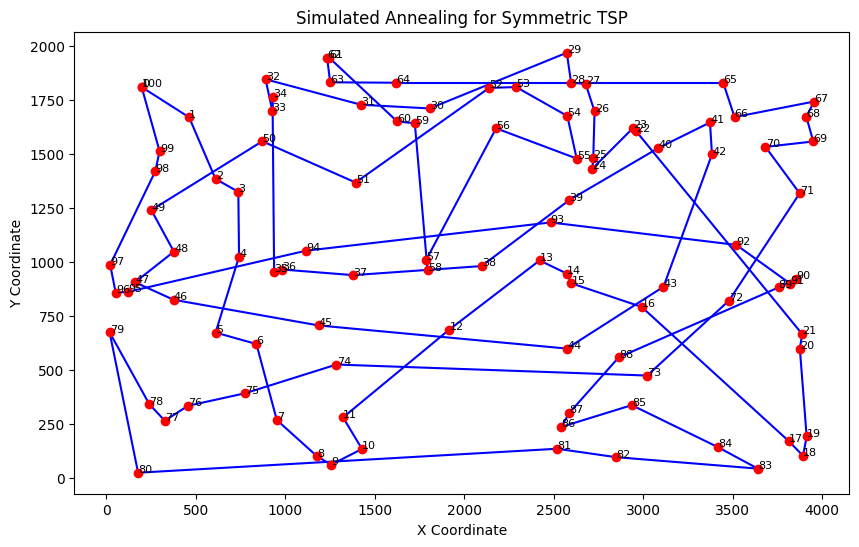

In [5]:
Simulated()

2nd

Best Tour: [9, 71, 10, 31, 67, 84, 38, 95, 77, 51, 47, 99, 40, 70, 13, 82, 6, 8, 56, 86, 80, 72, 63, 88, 30, 79, 68, 24, 50, 76, 97, 90, 22, 19, 85, 26, 54, 45, 2, 42, 34, 44, 58, 73, 20, 46, 11, 33, 28, 29, 4, 36, 49, 43, 81, 94, 75, 32, 12, 1, 78, 93, 69, 65, 25, 64, 3, 55, 41, 60, 61, 59, 14, 16, 89, 74, 96, 18, 15, 21, 87, 52, 48, 0, 27, 57, 92, 62, 5, 91, 7, 39, 53, 66, 35, 98, 37, 23, 17, 83, 9]
Best Length: 44238.54
CPU Time: 5.6414 seconds


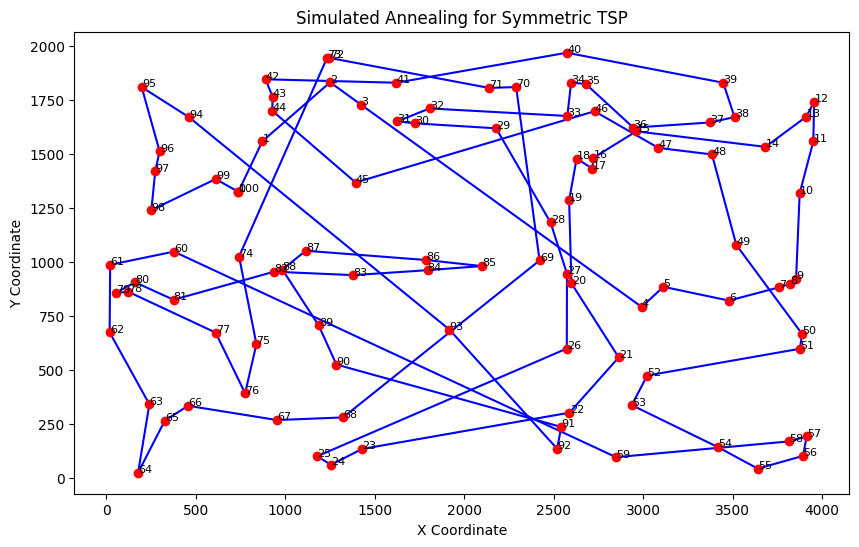

In [6]:
Simulated()

3rd

Best Tour: [72, 67, 49, 81, 94, 12, 75, 32, 36, 77, 82, 54, 76, 22, 18, 64, 25, 65, 3, 96, 66, 84, 38, 95, 29, 28, 33, 8, 86, 48, 52, 15, 87, 46, 59, 61, 56, 6, 26, 85, 34, 44, 14, 16, 35, 98, 37, 23, 17, 93, 69, 21, 78, 83, 71, 20, 73, 58, 10, 19, 11, 42, 40, 70, 2, 45, 13, 99, 47, 51, 4, 43, 1, 7, 91, 5, 62, 0, 27, 57, 60, 50, 24, 80, 68, 63, 39, 92, 97, 90, 31, 9, 89, 74, 55, 79, 30, 41, 88, 53, 72]
Best Length: 41645.86
CPU Time: 2.8275 seconds


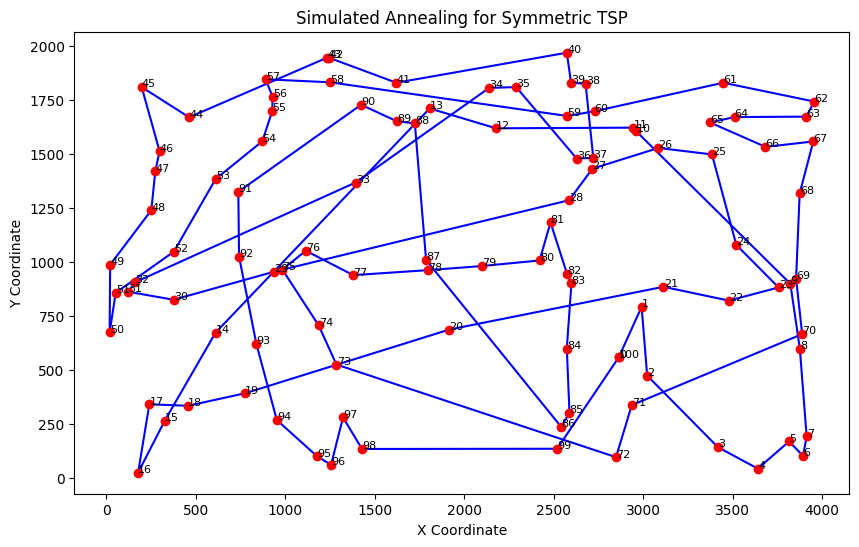

In [7]:
Simulated()

4th

Best Tour: [77, 51, 47, 26, 34, 85, 8, 80, 68, 39, 63, 72, 67, 49, 43, 53, 66, 57, 97, 90, 16, 14, 44, 22, 56, 6, 33, 28, 45, 2, 42, 54, 82, 13, 99, 70, 40, 11, 61, 59, 9, 83, 17, 23, 37, 98, 35, 58, 71, 62, 91, 7, 27, 92, 76, 19, 86, 50, 0, 5, 48, 89, 78, 87, 21, 15, 52, 24, 84, 38, 95, 4, 36, 32, 75, 12, 94, 81, 1, 88, 41, 30, 79, 55, 96, 74, 18, 3, 25, 64, 65, 69, 93, 20, 10, 73, 31, 46, 60, 29, 77]
Best Length: 39521.66
CPU Time: 2.6455 seconds


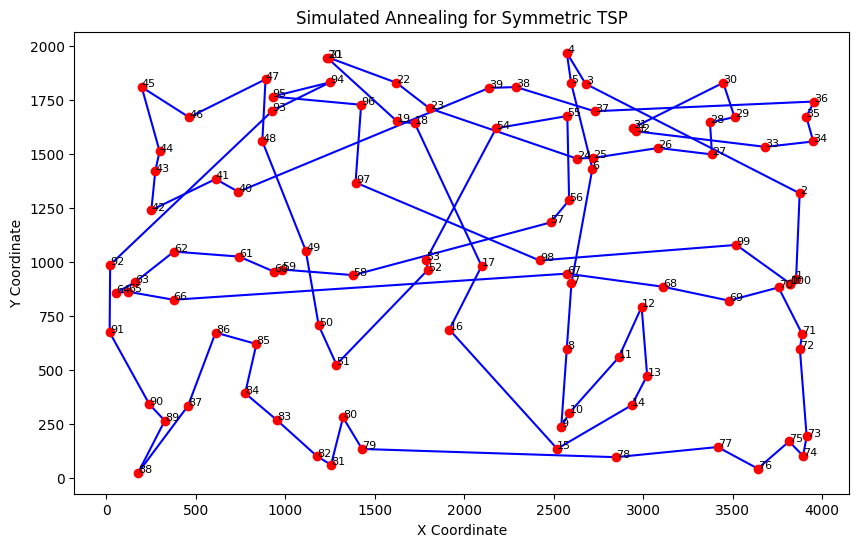

In [8]:
Simulated()

5th

Best Tour: [84, 63, 39, 68, 72, 81, 12, 94, 18, 87, 78, 9, 71, 20, 10, 58, 73, 16, 14, 76, 86, 50, 24, 80, 60, 57, 88, 79, 30, 41, 7, 66, 53, 1, 43, 49, 67, 8, 56, 11, 19, 92, 91, 74, 48, 5, 62, 46, 31, 44, 59, 34, 42, 2, 40, 70, 99, 47, 51, 77, 95, 29, 28, 82, 6, 33, 38, 75, 32, 36, 4, 13, 45, 61, 22, 97, 90, 0, 89, 83, 35, 98, 37, 23, 17, 3, 64, 25, 65, 69, 93, 21, 15, 52, 96, 55, 27, 85, 26, 54, 84]
Best Length: 41065.81
CPU Time: 6.0980 seconds


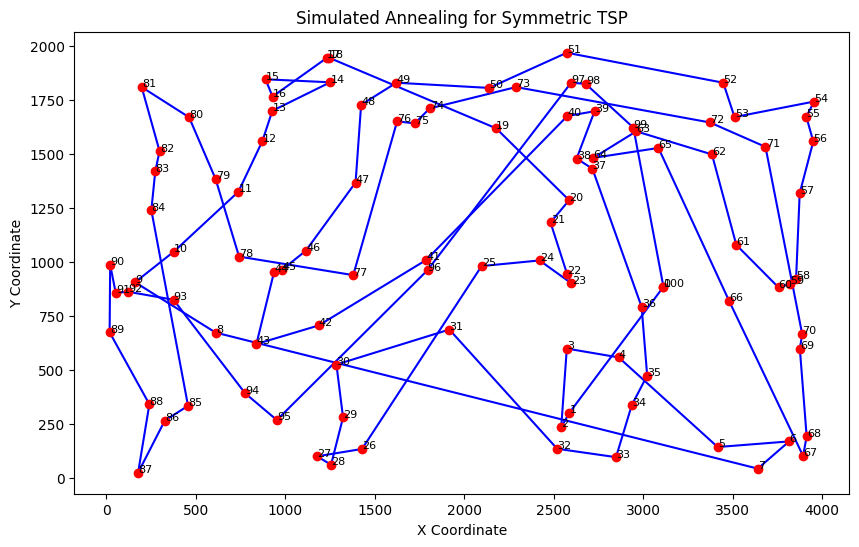

In [9]:
Simulated()

6th

Best Tour: [40, 34, 31, 71, 9, 7, 41, 79, 30, 53, 1, 94, 12, 75, 32, 49, 81, 36, 4, 51, 47, 99, 19, 76, 22, 90, 97, 56, 11, 54, 82, 33, 28, 45, 42, 2, 13, 29, 77, 95, 38, 84, 57, 92, 10, 58, 35, 98, 37, 23, 17, 15, 64, 25, 55, 88, 66, 68, 80, 24, 50, 60, 86, 8, 6, 67, 72, 43, 39, 63, 26, 85, 61, 59, 44, 14, 16, 93, 21, 69, 65, 3, 96, 74, 89, 83, 20, 73, 46, 27, 91, 0, 62, 5, 48, 78, 87, 52, 18, 70, 40]
Best Length: 43426.99
CPU Time: 6.1575 seconds


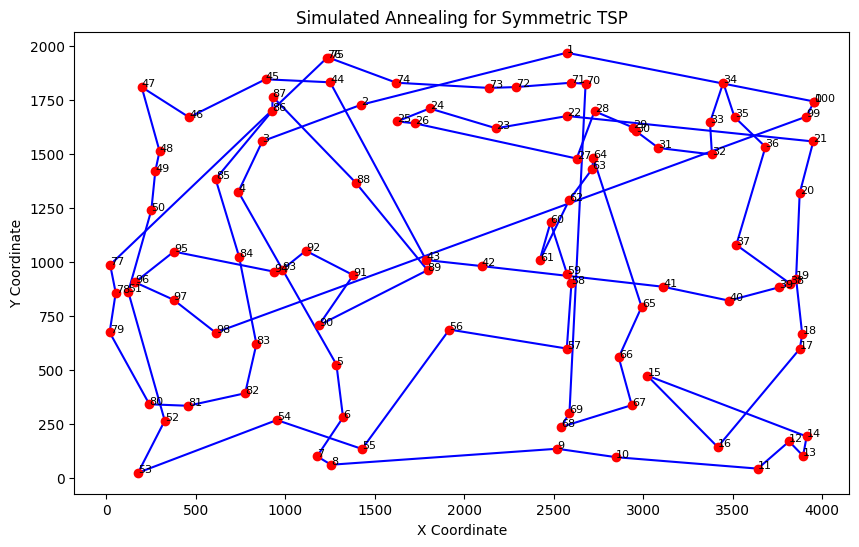

In [10]:
Simulated()

7th

Best Tour: [0, 91, 7, 41, 53, 39, 63, 38, 29, 84, 68, 5, 48, 96, 55, 79, 30, 88, 27, 92, 57, 60, 95, 77, 51, 4, 36, 12, 94, 81, 1, 43, 49, 67, 33, 28, 2, 13, 47, 32, 75, 72, 80, 24, 56, 6, 54, 11, 26, 85, 34, 59, 31, 71, 23, 17, 83, 62, 99, 70, 40, 42, 45, 82, 44, 10, 16, 14, 58, 73, 20, 35, 98, 37, 93, 21, 15, 52, 18, 74, 66, 50, 86, 8, 90, 46, 9, 78, 87, 69, 65, 25, 64, 3, 89, 76, 19, 61, 22, 97, 0]
Best Length: 42818.20
CPU Time: 4.4003 seconds


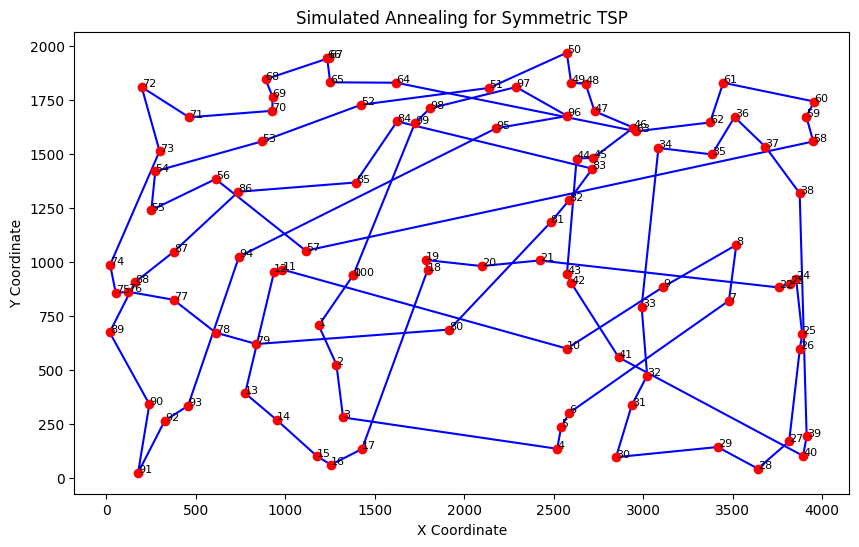

In [11]:
Simulated()

8th

Best Tour: [30, 88, 63, 43, 49, 94, 81, 1, 7, 15, 69, 65, 25, 64, 3, 96, 59, 61, 19, 6, 38, 36, 32, 75, 12, 57, 46, 71, 73, 16, 97, 22, 76, 50, 60, 24, 80, 28, 45, 2, 13, 77, 95, 29, 33, 26, 34, 85, 56, 68, 39, 53, 41, 18, 78, 37, 23, 17, 93, 21, 87, 52, 74, 11, 42, 40, 70, 99, 47, 51, 4, 84, 67, 72, 66, 9, 83, 20, 10, 31, 90, 44, 14, 58, 35, 98, 89, 62, 54, 82, 8, 86, 92, 27, 0, 91, 5, 48, 55, 79, 30]
Best Length: 46652.19
CPU Time: 4.2512 seconds


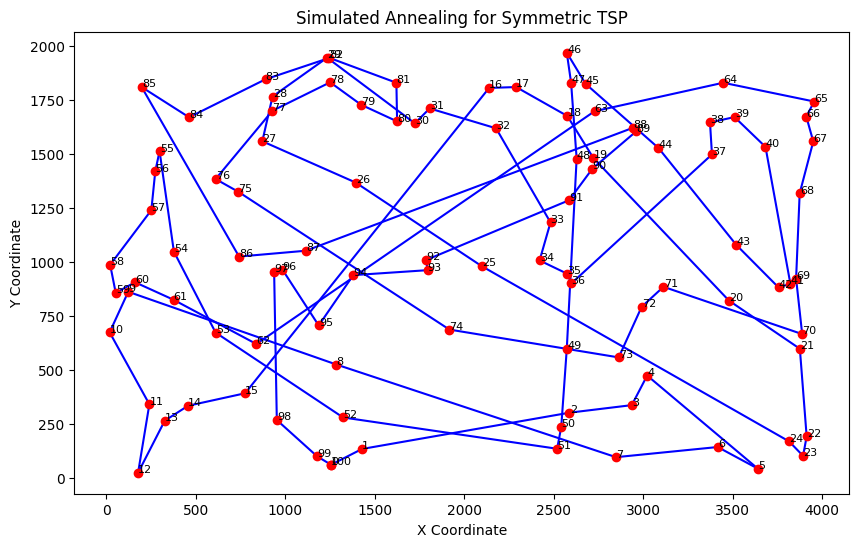

In [12]:
Simulated()

9th

Best Tour: [74, 3, 64, 25, 65, 78, 16, 14, 46, 76, 56, 6, 11, 26, 34, 22, 90, 48, 5, 62, 8, 28, 45, 42, 2, 13, 70, 40, 99, 47, 32, 75, 12, 94, 57, 27, 35, 37, 23, 17, 93, 98, 58, 73, 0, 53, 1, 68, 60, 92, 97, 31, 9, 83, 71, 20, 10, 44, 59, 61, 85, 19, 66, 88, 30, 79, 41, 39, 63, 80, 24, 50, 86, 82, 54, 33, 29, 51, 38, 67, 72, 49, 43, 81, 36, 4, 77, 95, 84, 89, 52, 87, 15, 21, 69, 18, 55, 96, 91, 7, 74]
Best Length: 43869.66
CPU Time: 4.6399 seconds


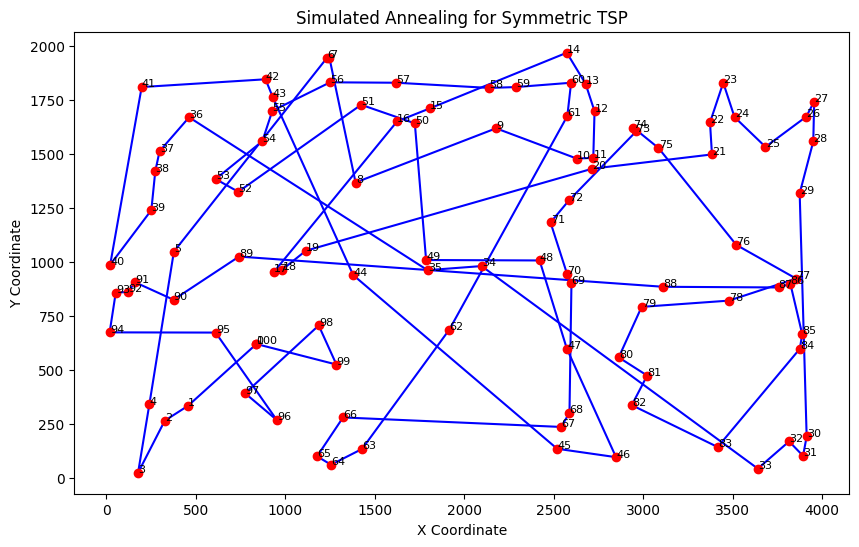

In [13]:
Simulated()

10th

Best Tour: [90, 44, 14, 16, 58, 20, 71, 83, 78, 52, 96, 55, 7, 39, 63, 68, 80, 86, 8, 36, 4, 77, 51, 29, 84, 67, 41, 79, 30, 88, 66, 24, 56, 6, 19, 85, 92, 27, 57, 60, 50, 72, 43, 0, 5, 48, 18, 69, 15, 87, 89, 62, 46, 31, 10, 73, 35, 98, 37, 23, 17, 21, 93, 9, 49, 38, 95, 47, 28, 33, 91, 74, 3, 65, 64, 25, 53, 1, 81, 94, 75, 32, 12, 61, 59, 22, 97, 76, 11, 54, 82, 42, 40, 70, 99, 13, 2, 45, 26, 34, 90]
Best Length: 44749.83
CPU Time: 4.4700 seconds


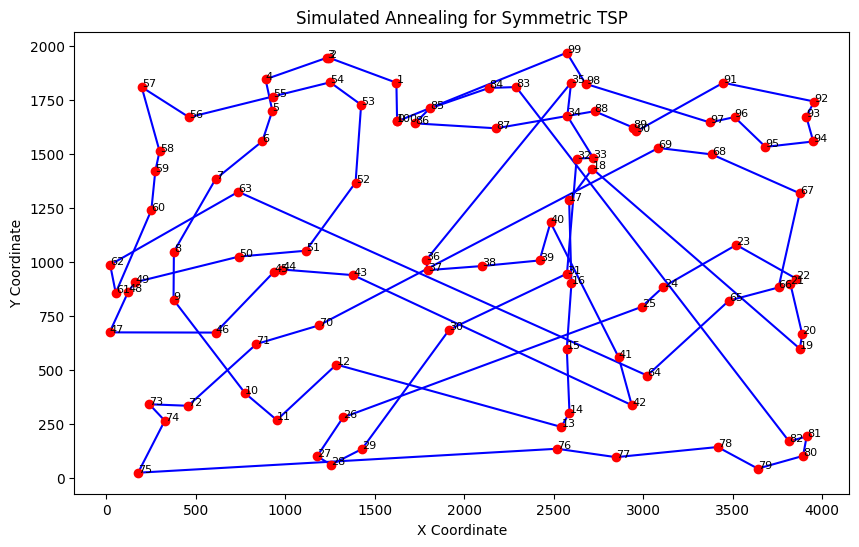

In [14]:
Simulated()